# Ford GoBike System Data Analysis
## by Swetha Vasudevan

## Preliminary Wrangling

This document explores a dataset containing individual rides made in a bike-sharing system covering the greater San Francisco Bay area

In [23]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import datetime as dt
from scipy.stats import norm

%matplotlib inline

In [24]:
bike = pd.read_csv("201902-fordgobike-tripdata.csv")

Analysing the general features of Ford GoBike System Dataset

In [25]:
print(bike.head())
print(bike.shape)
print(bike.describe())
print(bike.dtypes)


   duration_sec                start_time                  end_time  \
0         52185  2019-02-28 17:32:10.1450  2019-03-01 08:01:55.9750   
1         42521  2019-02-28 18:53:21.7890  2019-03-01 06:42:03.0560   
2         61854  2019-02-28 12:13:13.2180  2019-03-01 05:24:08.1460   
3         36490  2019-02-28 17:54:26.0100  2019-03-01 04:02:36.8420   
4          1585  2019-02-28 23:54:18.5490  2019-03-01 00:20:44.0740   

   start_station_id                                start_station_name  \
0              21.0  Montgomery St BART Station (Market St at 2nd St)   
1              23.0                     The Embarcadero at Steuart St   
2              86.0                           Market St at Dolores St   
3             375.0                           Grove St at Masonic Ave   
4               7.0                               Frank H Ogawa Plaza   

   start_station_latitude  start_station_longitude  end_station_id  \
0               37.789625              -122.400811            13

In [26]:
bike.duplicated().sum()

0

In [27]:
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 183412 entries, 0 to 183411
Data columns (total 16 columns):
duration_sec               183412 non-null int64
start_time                 183412 non-null object
end_time                   183412 non-null object
start_station_id           183215 non-null float64
start_station_name         183215 non-null object
start_station_latitude     183412 non-null float64
start_station_longitude    183412 non-null float64
end_station_id             183215 non-null float64
end_station_name           183215 non-null object
end_station_latitude       183412 non-null float64
end_station_longitude      183412 non-null float64
bike_id                    183412 non-null int64
user_type                  183412 non-null object
member_birth_year          175147 non-null float64
member_gender              175147 non-null object
bike_share_for_all_trip    183412 non-null object
dtypes: float64(7), int64(2), object(7)
memory usage: 22.4+ MB


In [28]:
bike.isnull().sum().sum()

17318

In [29]:
bike.dropna(inplace=True)
bike.isnull().sum().sum()

0

In [30]:
bike['start_time'] = pd.to_datetime(bike['start_time'])
bike['end_time'] = pd.to_datetime(bike['end_time'])
bike['start_time'].dt.year.unique()

array([2019])

In [31]:
bike['age'] = (2019-bike['member_birth_year']).astype(int)
bike['age']

0         35
2         47
3         30
4         45
5         60
6         36
7         30
8         31
9         27
10        23
11        26
12        29
14        31
15        26
16        38
17        44
18        29
19        41
20        36
21        35
22        28
23        22
24        44
25        33
26        19
27        37
29        24
30        23
31        26
32        39
          ..
183381    22
183382    31
183383    22
183384    28
183385    74
183386    21
183387    20
183388    92
183389    34
183390    20
183391    39
183392    26
183393    34
183394    44
183395    26
183396    28
183397    31
183398    37
183399    26
183400    35
183401    28
183403    19
183404    39
183405    35
183406    31
183407    23
183408    35
183409    29
183410    31
183411    30
Name: age, Length: 174952, dtype: int64

In [32]:
bike['start_hour'] =bike['start_time'].dt.hour
bike['start_hour']

0         17
2         12
3         17
4         23
5         23
6         23
7         23
8         23
9         23
10        23
11        23
12        23
14        23
15        23
16        23
17        23
18        23
19        23
20        23
21        23
22        23
23        23
24        23
25        23
26        23
27        23
29        23
30        23
31        23
32        23
          ..
183381     0
183382     0
183383     0
183384     0
183385     0
183386     0
183387     0
183388     0
183389     0
183390     0
183391     0
183392     0
183393     0
183394     0
183395     0
183396     0
183397     0
183398     0
183399     0
183400     0
183401     0
183403     0
183404     0
183405     0
183406     0
183407     0
183408     0
183409     0
183410     0
183411     0
Name: start_hour, Length: 174952, dtype: int64

In [33]:
print(bike['user_type'].unique())
print(bike['member_gender'].unique())
print(bike['bike_share_for_all_trip'].unique())

['Customer' 'Subscriber']
['Male' 'Other' 'Female']
['No' 'Yes']


### What is the structure of your dataset?

> This dataset containes 174952 entries. This includes information about the start_station_name, end_station_name, Duration(in seconds), start_time, end_time, user_type, member_gender, bike_share_for_all_trip, age and start_hour and 10 more columns.

### What is/are the main feature(s) of interest in your dataset?

> The main feature of interest for me is to analyse trip duration based on gender, membership and other related factors.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I believe the trip duration is hugely impacted by the gender and age. So i would like to use columns start_station_name, end_station_name,user_type, member_gender, user_type, bike_share_for_all_trip,age,start_hour and duration_sec.

In [34]:
# structure of the data
bike.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,start_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,35,17
2,61854,2019-02-28 12:13:13.218,2019-03-01 05:24:08.146,86.0,Market St at Dolores St,37.769305,-122.426826,3.0,Powell St BART Station (Market St at 4th St),37.786375,-122.404904,5905,Customer,1972.0,Male,No,47,12
3,36490,2019-02-28 17:54:26.010,2019-03-01 04:02:36.842,375.0,Grove St at Masonic Ave,37.774836,-122.446546,70.0,Central Ave at Fell St,37.773311,-122.444293,6638,Subscriber,1989.0,Other,No,30,17
4,1585,2019-02-28 23:54:18.549,2019-03-01 00:20:44.074,7.0,Frank H Ogawa Plaza,37.804562,-122.271738,222.0,10th Ave at E 15th St,37.792714,-122.248780,4898,Subscriber,1974.0,Male,Yes,45,23
5,1793,2019-02-28 23:49:58.632,2019-03-01 00:19:51.760,93.0,4th St at Mission Bay Blvd S,37.770407,-122.391198,323.0,Broadway at Kearny,37.798014,-122.405950,5200,Subscriber,1959.0,Male,No,60,23


In [35]:
#main features of interest in this dataset
bike.shape

(174952, 18)

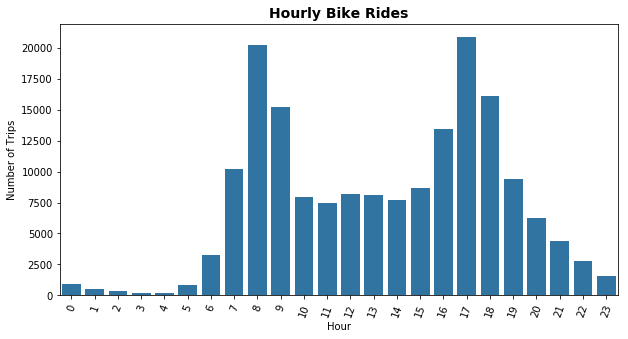

In [36]:
plt.figure(figsize=[10,5]);
base_color= sb.color_palette()[0]
sb.countplot(data= bike, x='start_hour', color= base_color);
plt.xticks(rotation= 70);
plt.xlabel('Hour');
plt.ylabel('Number of Trips');
plt.title('Hourly Bike Rides', fontsize=14, fontweight='bold');

## Univariate Exploration

> In this section, I will try to understand the data and clean it up so that I can use to study about the independent variables and their relationship with other variables.

I'm starting with identifying the top 10 start stations

In [37]:
start_counts = bike['start_station_name'].value_counts().reset_index(name='number_of_trips')[:10]
start_order=start_counts['index']

In [38]:
start_sub = bike.loc[bike['start_station_name'].isin(start_order)]
start_sub

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,member_birth_year,member_gender,bike_share_for_all_trip,age,start_hour
0,52185,2019-02-28 17:32:10.145,2019-03-01 08:01:55.975,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,13.0,Commercial St at Montgomery St,37.794231,-122.402923,4902,Customer,1984.0,Male,No,35,17
38,1066,2019-02-28 23:31:16.139,2019-02-28 23:49:02.792,58.0,Market St at 10th St,37.776619,-122.417385,145.0,29th St at Church St,37.743684,-122.426806,5938,Subscriber,1992.0,Female,No,27,23
42,1554,2019-02-28 23:20:24.089,2019-02-28 23:46:19.019,15.0,San Francisco Ferry Building (Harry Bridges Pl...,37.795392,-122.394203,284.0,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,5411,Subscriber,1972.0,Male,No,47,23
54,401,2019-02-28 23:30:52.471,2019-02-28 23:37:33.955,58.0,Market St at 10th St,37.776619,-122.417385,62.0,Victoria Manalo Draves Park,37.777791,-122.406432,5407,Subscriber,1990.0,Female,No,29,23
63,239,2019-02-28 23:28:42.709,2019-02-28 23:32:41.769,21.0,Montgomery St BART Station (Market St at 2nd St),37.789625,-122.400811,343.0,Bryant St at 2nd St,37.783172,-122.393572,5731,Subscriber,1986.0,Male,No,33,23
78,355,2019-02-28 23:18:55.691,2019-02-28 23:24:51.563,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,62.0,Victoria Manalo Draves Park,37.777791,-122.406432,6102,Subscriber,1983.0,Male,No,36,23
82,137,2019-02-28 23:17:17.968,2019-02-28 23:19:35.846,30.0,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,64.0,5th St at Brannan St,37.776754,-122.399018,6520,Subscriber,1990.0,Male,No,29,23
85,73,2019-02-28 23:17:06.483,2019-02-28 23:18:19.711,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,80.0,Townsend St at 5th St,37.775235,-122.397437,5012,Subscriber,1995.0,Male,No,24,23
89,1803,2019-02-28 22:46:44.094,2019-02-28 23:16:48.092,67.0,San Francisco Caltrain Station 2 (Townsend St...,37.776639,-122.395526,9.0,Broadway at Battery St,37.798572,-122.400869,6581,Subscriber,1991.0,Female,No,28,22
110,371,2019-02-28 23:01:15.077,2019-02-28 23:07:26.459,58.0,Market St at 10th St,37.776619,-122.417385,98.0,Valencia St at 16th St,37.765052,-122.421866,6435,Subscriber,1994.0,Male,No,25,23


Text(0.5,1,'Top 10 Start Stations')

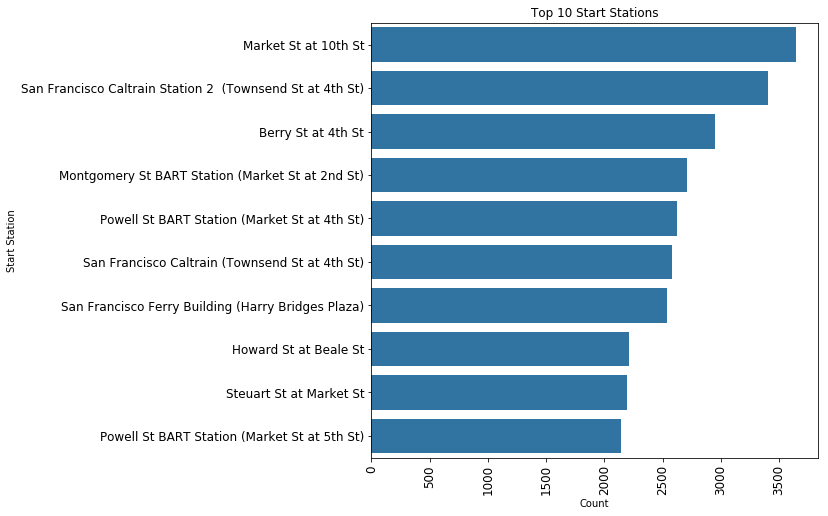

In [39]:
base_colour = sb.color_palette()[0]
plt.figure(figsize =[8,8])
axis = sb.countplot(data=start_sub,y='start_station_name',color=base_colour,order =start_order)
plt.xticks(rotation =90, size =12)
plt.yticks(size = 12)
plt.ylabel('Start Station', size=10)
plt.xlabel('Count',size =10)
plt.title('Top 10 Start Stations')

Now I'm trying to find out top 10 End stations using end_station_name column

In [40]:
end_count = bike['end_station_name'].value_counts().reset_index(name='number_of_trips')[:10]
end_order = end_count['index']
end_sub =bike.loc[bike['end_station_name'].isin(end_count["index"])]

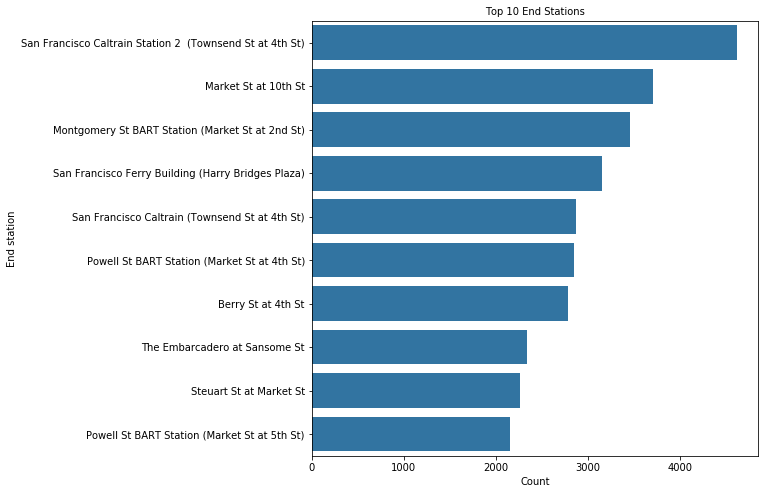

In [41]:
plt.figure(figsize=[8,8])
axis = sb.countplot(data=end_sub, y='end_station_name',color =base_colour,order =end_order)
plt.ylabel('End station',size=10)
plt.xlabel('Count',size =10)
plt.title('Top 10 End Stations',size=10)
for item in(axis.get_xticklabels() + axis.get_yticklabels()):
    item.set_fontsize(10)
    

I'm trying to compare the results for top 10 start stations and top 10 end stations and I found out that 9 of 10 stations are same.

In [42]:
# Check whether there is a same start and end station in top 10 list
(end_order.isin(start_order)).sum()

9

Now I'm trying to understand the statisticial information to identify an errors in the dataset or outliers.

In [43]:
bike.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id,member_birth_year,age,start_hour
count,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000,174952.000000
mean,704.002744,139.002126,37.771220,-122.351760,136.604486,37.771414,-122.351335,4482.587555,1984.803135,34.196865,13.456165
std,1642.204905,111.648819,0.100391,0.117732,111.335635,0.100295,0.117294,1659.195937,10.118731,10.118731,4.734282
min,61.000000,3.000000,37.317298,-122.453704,3.000000,37.317298,-122.453704,11.000000,1878.000000,18.000000,0.000000
25%,323.000000,47.000000,37.770407,-122.411901,44.000000,37.770407,-122.411647,3799.000000,1980.000000,27.000000,9.000000
50%,510.000000,104.000000,37.780760,-122.398279,101.000000,37.781010,-122.397437,4960.000000,1987.000000,32.000000,14.000000
75%,789.000000,239.000000,37.797320,-122.283093,238.000000,37.797673,-122.286533,5505.000000,1992.000000,39.000000,17.000000
max,84548.000000,398.000000,37.880222,-121.874119,398.000000,37.880222,-121.874119,6645.000000,2001.000000,141.000000,23.000000


In the age column, the minimum age is 18 which is acceptable whereas the maximum age is 141 which is impossible. So I'll write a query to remove the information where the age is greater than 95.

In [44]:
bike =bike.query('age<95')

Let's study the trip duration distribution now .....

Text(0.5,1,'Trip Duration distribution')

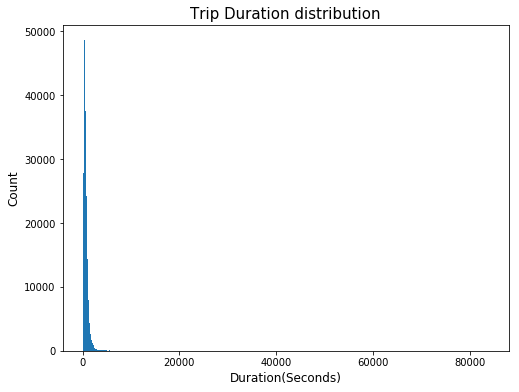

In [45]:
plt.figure(figsize=[8,6])
bins =np.arange(60,84e3,200)
plt.hist(data=bike, x='duration_sec',bins=bins)
plt.xlabel('Duration(Seconds)',size=12)
plt.ylabel('Count',size=12)
plt.title('Trip Duration distribution',size=15)

From the above visualization I could not study the distribution clearly so I'll try to set an interval for the y axis so that i can study about x-axis further. I'll use logarthmic scale below.

Text(0.5,1,'Trip Duration Distribution')

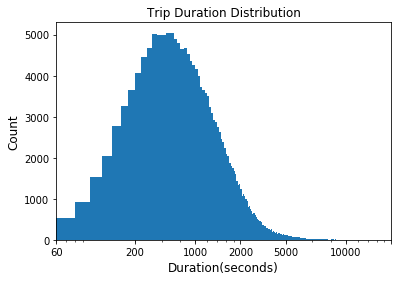

In [46]:
bins =np.arange(60,1e4,20)
plt.hist(data=bike,x='duration_sec',bins=bins)
plt.xscale('log')
plt.xlim(60,1e4)
x_tick = [60,200,500,1000,2000,5000,10000]
x_ticklabels =['60','200','1000','2000','5000','10000']
plt.xticks(x_tick,x_ticklabels)
plt.xlabel('Duration(seconds)',size =12)
plt.ylabel('Count',size =12)
plt.title('Trip Duration Distribution',size=12)

The curve reaches peak at around 300 seconds. Right half of the curve has many trips where the duration did not lost longer than 1500 seconds and fewer trips had longer trips.

Next, I'll try to use Q-Q plot to find out outlier in duration_sec column.

In [47]:
n_points = bike.shape[0]
p_points =(np.arange(n_points)-0.5)/n_points
sample_mean =bike['duration_sec'].mean()
sample_std =bike['duration_sec'].std()
expected_data = norm.ppf(p_points,sample_mean,sample_std)

Text(0.5,0.98,'Q-Q plot showing ouliers in Trip duration')

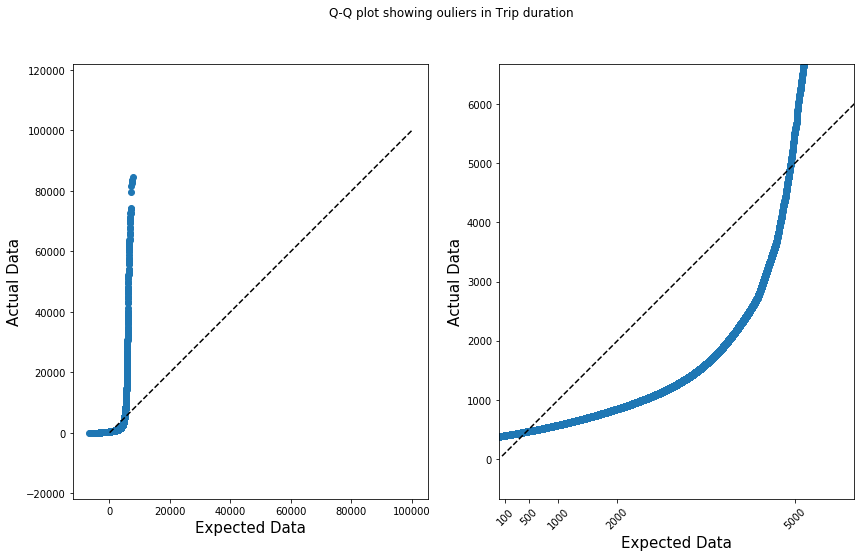

In [48]:
plt.figure(figsize=[14,8])
plt.subplot(1,2,1)
plt.scatter(expected_data,bike['duration_sec'].sort_values())
plt.plot([50,1e5],[50,1e5],'--',color ='black')
plt.axis('equal')
plt.xlabel('Expected Data',size=15)
plt.ylabel('Actual Data',size =15)


plt.subplot(1,2,2)
plt.scatter(expected_data, bike['duration_sec'].sort_values())
plt.plot([50,1e5],[50,1e5],'--',color ='black')
plt.axis('equal')
plt.xlim(0,6000)
plt.ylim(0,6000)
plt.xticks([100,500,1000,2000,5000],[100,500,1000,2000,5000],rotation =45)
plt.xlabel('Expected Data',size =15)
plt.ylabel('Actual Data',size=15)
plt.suptitle('Q-Q plot showing ouliers in Trip duration')

From above plots it is clear that there are many outliers in the duration_sec column

In [49]:
bike.shape

(174877, 18)

In [50]:
bike =bike.query('duration_sec <=4000')
print(bike.shape)
(181292*100)/182289

(173679, 18)


99.45306628485537

I removes 0.54% of outliers from the given data

I'll study about another variable in this dataset(user_type)

Text(0.5,1,'Types of Users')

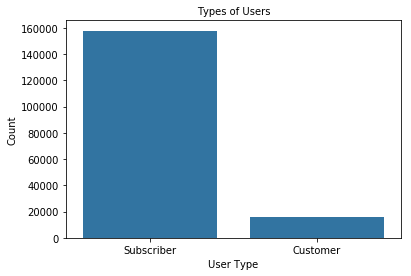

In [51]:
base_colour = sb.color_palette()[0]
sb.countplot(data=bike, x='user_type',color =base_colour)
plt.xlabel('User Type',size =10)
plt.ylabel('Count',size=10)
plt.title('Types of Users',size=10)

From this I can interpret that 80% of the GoBike users hold subscription and the rest 20% are the normal customers.

Now, Let's findout which gender is using GoBike mostly.

Text(0.5,1,'Users gender')

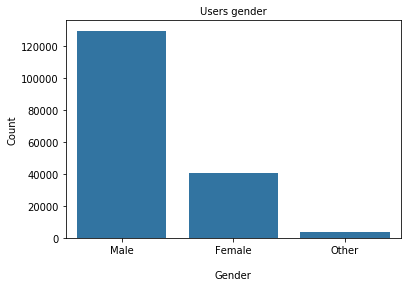

In [52]:
sb.countplot(data=bike, x='member_gender', color=base_colour)
plt.xlabel('Gender', labelpad =15, size=10)
plt.ylabel('Count', size =10)
plt.title('Users gender',size=10)


Above chart explains that male use this sharing bikes more than females and others.

Now let's findout whether the most users share the bike for their trips

Text(0.5,1,'Bike share for all trips')

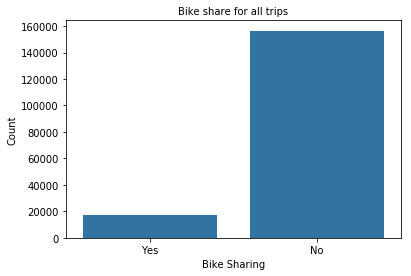

In [53]:
sb.countplot(data=bike, x='bike_share_for_all_trip',color =base_colour)
plt.xlabel('Bike Sharing', size=10)
plt.ylabel('Count', size=10)
plt.title('Bike share for all trips', size=10)

It is evident that most subscribers do not share their bikes for their trips.

Let's find out which age group is using these bikes more.

Text(0.5,1,'Age distribution for user')

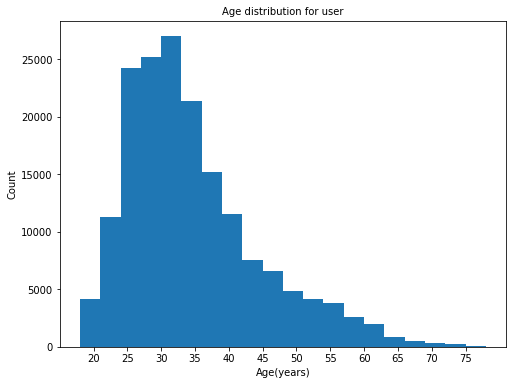

In [54]:
bins= np.arange(18,81,3)
plt.figure(figsize=[8,6])
axis = plt.hist(data=bike, x='age',bins=bins)
plt.xticks(np.arange(20,80,5))
plt.xlabel('Age(years)',size=10)
plt.ylabel('Count',size=10)
plt.title('Age distribution for user',size=10)

I can clearly see that people from age 20 - 40 are the high users.

Now it's time to find out what time of the day do they use them the most


Text(0.5,1,'Start hour distribution for trip')

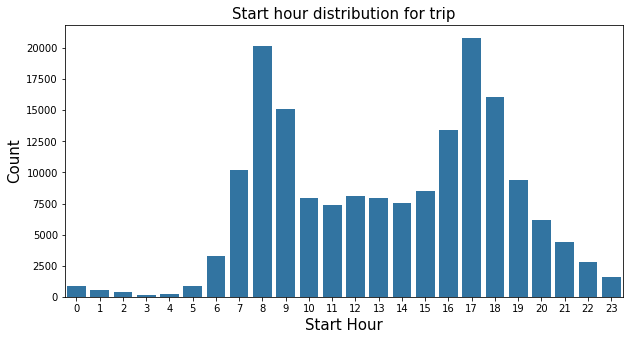

In [55]:
plt.figure(figsize =[10,5])
sb.countplot(data=bike, x='start_hour',color =base_colour)
plt.xlabel('Start Hour',size=15)
plt.ylabel('Count',size=15)
plt.title('Start hour distribution for trip',size=15)

This bar plot has two peaks with one at 8 AM and other at 5 PM. It is pretty much busy during the day time between 6AM to 9PM.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> I found out an unusal trend while studying the duration_sec column. The curve is right_skewed and it was hard to understand the distribution. Then I limited the x axis using logarthmic scale to find frequent intervals.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> People who use more Ford GoBike sharing system belong to 20-40 years of age. But the statistical information mentioned that the maximum age is 141 years. But I did not use any transformations for now.

## Bivariate Exploration

> In this section, I will investigate between the duration and other variables.

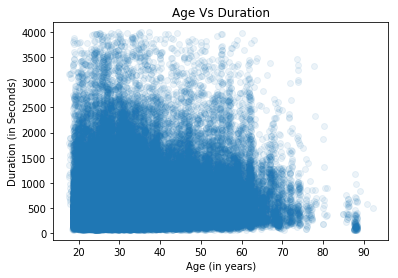

In [56]:
sb.regplot(data=bike,x='age',y='duration_sec',fit_reg=False, x_jitter=0.4, scatter_kws={'alpha':1/12})
plt.xlabel('Age (in years)')
plt.ylabel('Duration (in Seconds)')
plt.title('Age Vs Duration');

From the above scatter plot it is interpreted that when the age increases the duration decreases. Age and duration are inversely proportional to each other.

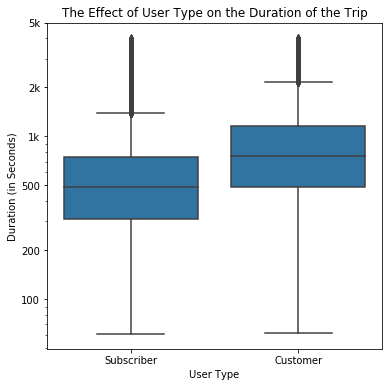

In [57]:
plt.figure(figsize=[6,6])
sb.boxplot(data=bike,x='user_type',y='duration_sec',color=base_colour)
plt.yscale('log')
y_ticklocs=[100,200,500,1e3,2e3,5e3]
y_ticklabels=['100','200','500','1k','2k','5k']
plt.yticks(y_ticklocs,y_ticklabels)
plt.xlabel('User Type')
plt.ylabel('Duration (in Seconds)')
plt.title('The Effect of User Type on the Duration of the Trip');

From this boxplot, I understand that non-subscribers/Customers has longer duration than the subscribers.

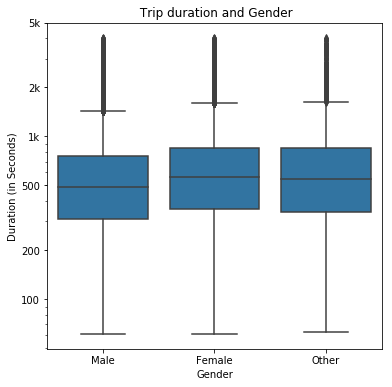

In [58]:
plt.figure(figsize=[6,6])
sb.boxplot(data=bike,x='member_gender',y='duration_sec',color=base_colour,order=['Male','Female','Other'])
plt.yscale('log')
y_ticklocs=[100,200,500,1e3,2e3,5e3]
y_ticklabels=['100','200','500','1k','2k','5k']
plt.yticks(y_ticklocs,y_ticklabels)
plt.xlabel('Gender')
plt.ylabel('Duration (in Seconds)')
plt.title(' Trip duration and Gender');

From this plot, it is clear that male have shorter trip than females but the difference is not high.

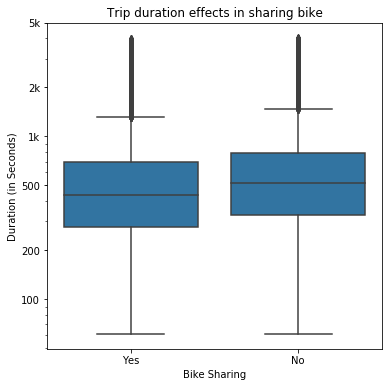

In [59]:
plt.figure(figsize=[6,6])
sb.boxplot(data=bike,x='bike_share_for_all_trip',y='duration_sec',color=base_colour)
plt.yscale('log')
y_ticklocs=[100,200,500,1e3,2e3,5e3]
y_ticklabels=['100','200','500','1k','2k','5k']
plt.yticks(y_ticklocs,y_ticklabels)
plt.xlabel('Bike Sharing')
plt.ylabel('Duration (in Seconds)')
plt.title('Trip duration effects in sharing bike');


People who does not share the bike during their trip has longer duration than people who share their bike.

Now I'll study about the mean trip duration( from start station and end station)

In [60]:
start_mean=bike[['start_station_name','duration_sec']].groupby(['start_station_name']).mean()
start_order=start_mean.sort_values(['duration_sec'], ascending=False)
long_start=pd.DataFrame(start_order).reset_index().head(10)
short_start=pd.DataFrame(start_order).reset_index().tail(10)[::-1]

In [61]:
end_mean=bike[['end_station_name','duration_sec']].groupby(['end_station_name']).mean()
end_order=end_mean.sort_values(['duration_sec'], ascending=False)
long_end=pd.DataFrame(end_order).reset_index().head(10)
short_end=pd.DataFrame(end_order).reset_index().tail(10)[::-1]

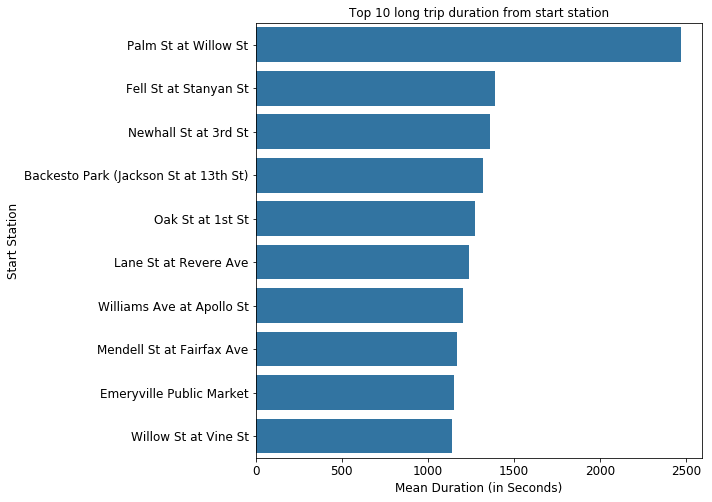

In [62]:
plt.figure(figsize=[8,8])
axis=sb.barplot(data=long_start,y='start_station_name', x='duration_sec', color=base_colour)
for item in (axis.get_xticklabels() + axis.get_yticklabels()):
    item.set_fontsize(12)
plt.ylabel('Start Station',size=12)
plt.xlabel('Mean Duration (in Seconds)', size=12)
plt.title('Top 10 long trip duration from start station',size=12);


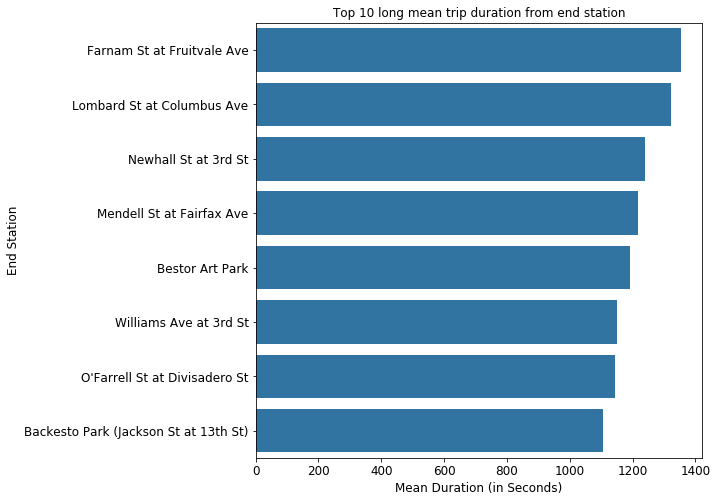

In [63]:
plt.figure(figsize=[8,8])
axis=sb.barplot(data=long_end[2:],y='end_station_name', x='duration_sec', color=base_colour)
for item in (axis.get_xticklabels() + axis.get_yticklabels()):
    item.set_fontsize(12)
plt.ylabel('End Station',size=12)
plt.xlabel('Mean Duration (in Seconds)', size=12)
plt.title('Top 10 long mean trip duration from end station',size=12);

Text(0.5,1,'Top 10 start staion with shortest mean')

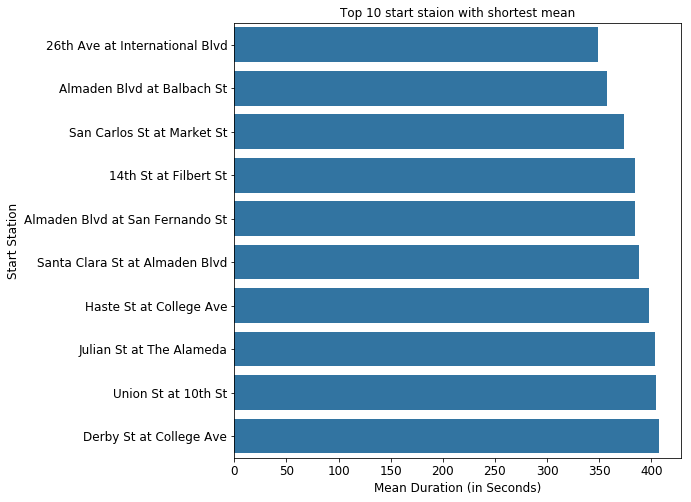

In [64]:
plt.figure(figsize=[8,8])
axis=sb.barplot(data=short_start,y='start_station_name', x='duration_sec', color=base_colour)
for item in (axis.get_xticklabels() + axis.get_yticklabels()):
    item.set_fontsize(12)
plt.ylabel('Start Station',size=12)
plt.xlabel('Mean Duration (in Seconds)', size=12)
plt.title('Top 10 start staion with shortest mean',size=12)

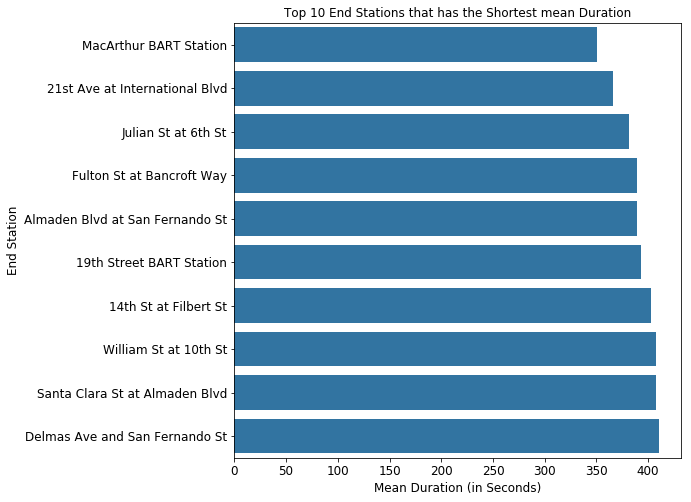

In [65]:
plt.figure(figsize=[8,8])
axis=sb.barplot(data=short_end,y='end_station_name', x='duration_sec', color=base_colour)
for item in (axis.get_xticklabels() + axis.get_yticklabels()):
    item.set_fontsize(12)
plt.ylabel('End Station',size=12)
plt.xlabel('Mean Duration (in Seconds)', size=12)
plt.title('Top 10 End Stations that has the Shortest mean Duration',size=12);

Let's study about the number of stations that are associated with longer duration at both start and end station

In [66]:
long_start['start_station_name'].isin(long_end['end_station_name']).sum()

4

In [67]:
short_start['start_station_name'].isin(short_end['end_station_name']).sum()

3

For these 4 charts it is clear that longest start station and end station is same for the shortest start station and end station.

Now I'll analyse the relationship between age and user type, bike sharing

Text(0.5,1,'Bikeshare Vs Age')

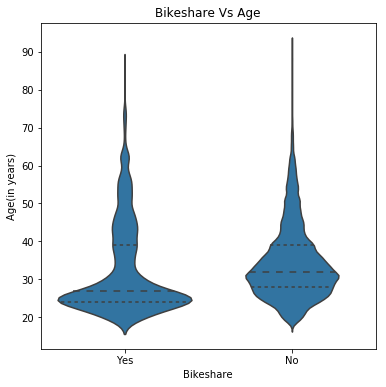

In [68]:
plt.figure(figsize =[6,6])
sb.violinplot(data =bike,x='bike_share_for_all_trip',y='age',color = base_colour, inner ='quartile')
plt.xlabel('Bikeshare')
plt.ylabel ('Age(in years)')
plt.title ('Bikeshare Vs Age')

For the above violin chart it is infered that in younger age the bike share is high

Text(0.5,1,'User Type Vs Age')

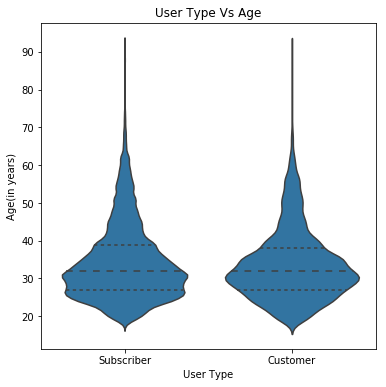

In [69]:
plt.figure(figsize =[6,6])
sb.violinplot(data =bike,x='user_type',y='age',color = base_colour, inner ='quartile')
plt.xlabel('User Type')
plt.ylabel ('Age(in years)')
plt.title ('User Type Vs Age')

In this plot, the result is same for both the cases which is not possible.

Now, I will analyse how gender type affects bike sharing

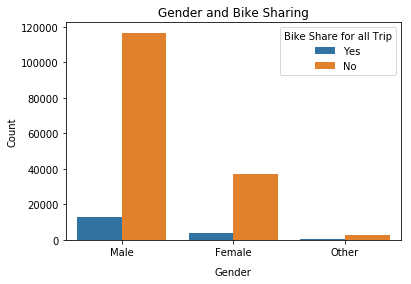

In [70]:
sb.countplot(data=bike,x='member_gender',hue='bike_share_for_all_trip')
plt.xlabel('Gender',labelpad=10)
plt.ylabel('Count')
plt.legend(title='Bike Share for all Trip')
plt.title('Gender and Bike Sharing');

This infers that there is no relationship between gender and bikesharing.

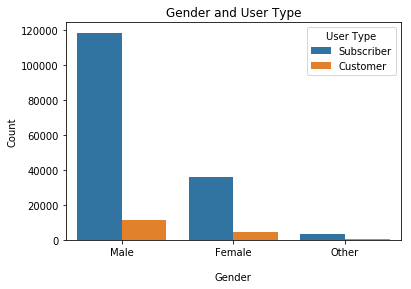

In [71]:
sb.countplot(data=bike,x='member_gender',hue='user_type')
plt.xlabel('Gender',labelpad=15)
plt.ylabel('Count')
plt.legend(title='User Type')
plt.title('Gender and User Type');

Even with different user type and different gender there is no relationship

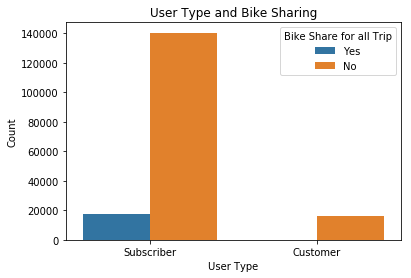

In [72]:
sb.countplot(data=bike,x='user_type',hue='bike_share_for_all_trip')
plt.xlabel('User Type')
plt.ylabel('Count')
plt.legend(title='Bike Share for all Trip')
plt.title('User Type and Bike Sharing');

Non-Subscribers/Customers do not share their bike. It is evident from above figure that some proportion of subscribers bike share.

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

>Trip duration decreases when the age increases.
>Customers tend to have longer trip duration than subscribers
>Stations with longest trip duration in start station is same as the end station
>Stations with shortest trip duration in start station is same as the end station

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
 
>Most people who share bikes are in 20's age.
>Some portion of subscribers bike share



## Multivariate Exploration



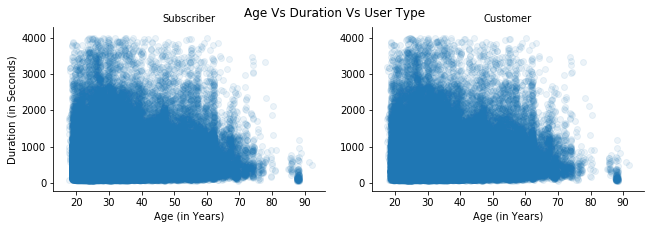

In [73]:
g=sb.FacetGrid(data=bike,col='user_type',aspect=1.5)
g.map(sb.regplot,data=bike, x='age',y='duration_sec',fit_reg=False, x_jitter=0.4, scatter_kws={'alpha':1/12})
g.set_titles('{col_name}')
g.set_axis_labels('Age (in Years)','Duration (in Seconds)')
plt.suptitle('Age Vs Duration Vs User Type');

From the above plot it is understood that user type has no relation iwth age and subscribers.

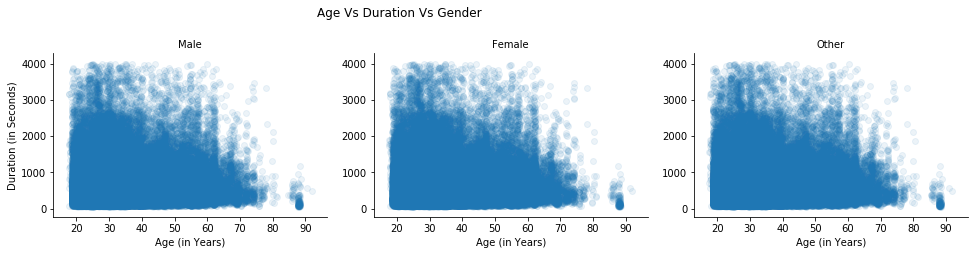

In [74]:
g=sb.FacetGrid(data=bike,col='member_gender',aspect=1.5)
g.map(sb.regplot,data=bike, x='age',y='duration_sec',fit_reg=False, x_jitter=0.4, scatter_kws={'alpha':1/12})
g.set_titles('{col_name}')
g.set_axis_labels('Age (in Years)','Duration (in Seconds)')
plt.suptitle('Age Vs Duration Vs Gender',x=0.4,y=1.1);

From above plot, Gender does not affect the trip duration based on their age

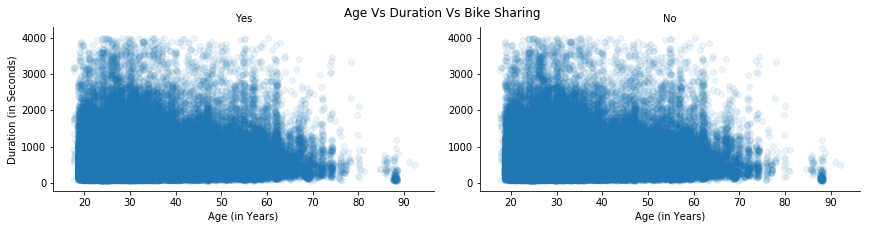

In [75]:
g=sb.FacetGrid(data=bike,col='bike_share_for_all_trip',aspect=2)
g.map(sb.regplot,data=bike, x='age',y='duration_sec',fit_reg=False, x_jitter=0.4, scatter_kws={'alpha':1/12})
g.set_titles('{col_name}')
g.set_axis_labels('Age (in Years)','Duration (in Seconds)')
plt.suptitle('Age Vs Duration Vs Bike Sharing');

From above plot, Bikesharing is not affected by the age and trip duration.

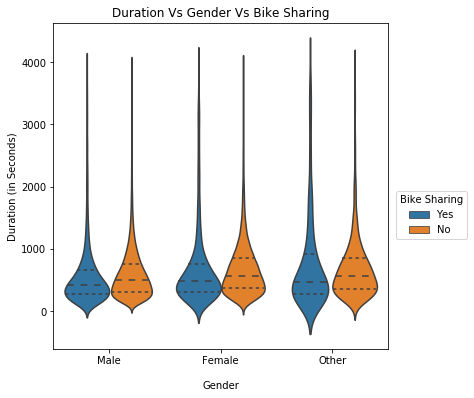

In [76]:
plt.figure(figsize=[6,6])
sb.violinplot(data=bike,x='member_gender',y='duration_sec',hue='bike_share_for_all_trip',inner='quartile')
plt.xlabel('Gender', labelpad=15)
plt.ylabel('Duration (in Seconds)')
plt.title('Duration Vs Gender Vs Bike Sharing')
plt.legend(title='Bike Sharing', bbox_to_anchor=(1.25,0.5));

From above plot it is clear that bike share increases the trip duration in all genders.

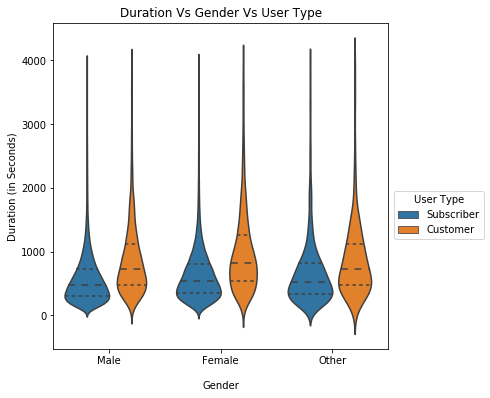

In [77]:
plt.figure(figsize=[6,6])
sb.violinplot(data=bike,x='member_gender',y='duration_sec',hue='user_type',inner='quartile')
plt.xlabel('Gender', labelpad=15)
plt.ylabel('Duration (in Seconds)')
plt.title('Duration Vs Gender Vs User Type')
plt.legend(title='User Type', bbox_to_anchor=(1.3,0.5));

In all genders, customers have longer trip duration and subscribers have shorter trip duration

To analyse the start and end points of both the longest and shortest trips, I will create a new column called "start_end" with the start and end points of each trip in each cell.

In [80]:
bike['start_end']=bike['start_station_name'] + ' to '+ bike['end_station_name']
trip_means=bike[['start_end','duration_sec']].groupby(['start_end']).mean()
trip_ordered= trip_means.sort_values(['duration_sec'], ascending=False)
longest_trip=pd.DataFrame(trip_ordered).reset_index().head(10)
shortest_trip=pd.DataFrame(trip_ordered).reset_index().tail(10)[::-1]

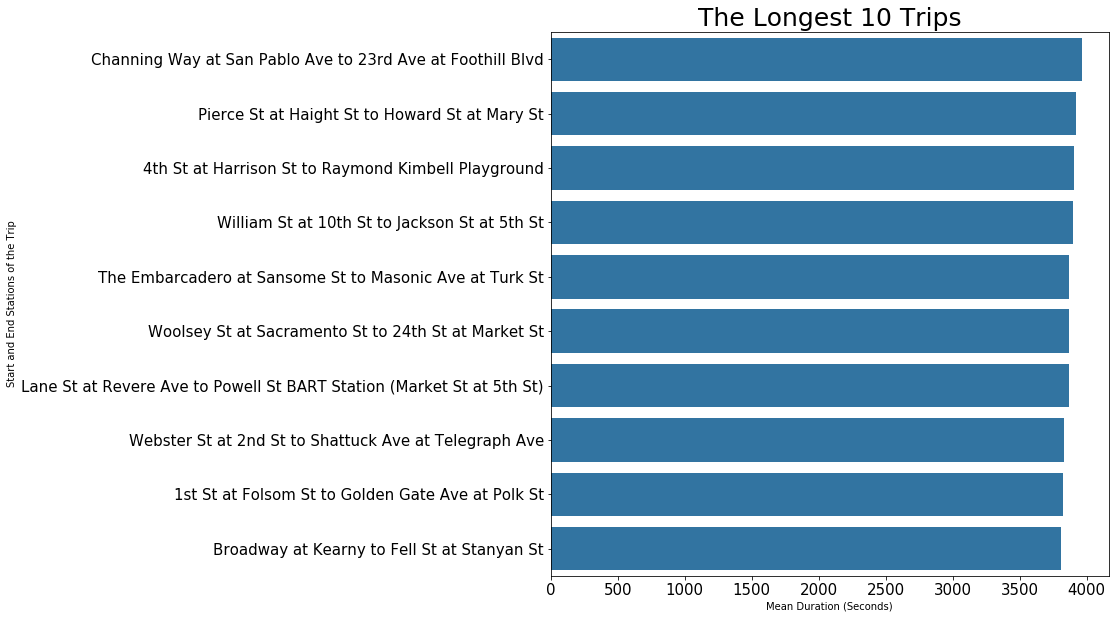

In [81]:
plt.figure(figsize=[10,10])
ax=sb.barplot(data=longest_trip, x='duration_sec', y='start_end',color=base_color)
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
plt.xlabel('Mean Duration (Seconds)',size=10)
plt.ylabel('Start and End Stations of the Trip',size=10)
plt.title('The Longest 10 Trips',size=25);

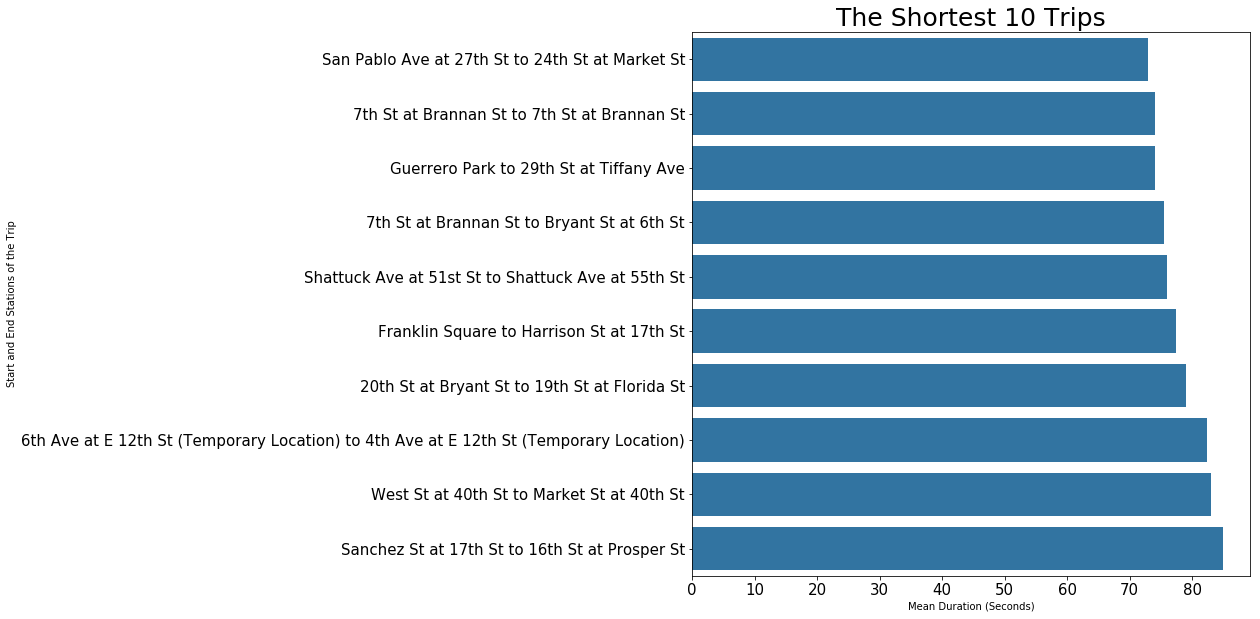

In [83]:
plt.figure(figsize=[10,10])
ax=sb.barplot(data=shortest_trip, x='duration_sec', y='start_end',color=base_color)
for item in (ax.get_xticklabels() + ax.get_yticklabels()):
    item.set_fontsize(15)
plt.xlabel('Mean Duration (Seconds)',size=10)
plt.ylabel('Start and End Stations of the Trip',size=10)
plt.title('The Shortest 10 Trips',size=25);

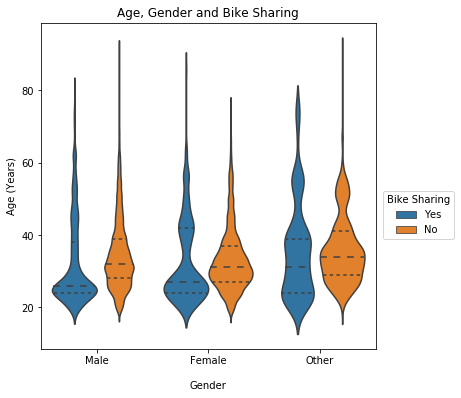

In [84]:
plt.figure(figsize=[6,6])
sb.violinplot(data=bike,x='member_gender',y='age',hue='bike_share_for_all_trip',inner='quartile')
plt.xlabel('Gender', labelpad=15)
plt.ylabel('Age (Years)')
plt.title('Age, Gender and Bike Sharing')
plt.legend(title='Bike Sharing', bbox_to_anchor=(1.25,0.5));

Young people do bike share more than other age categories

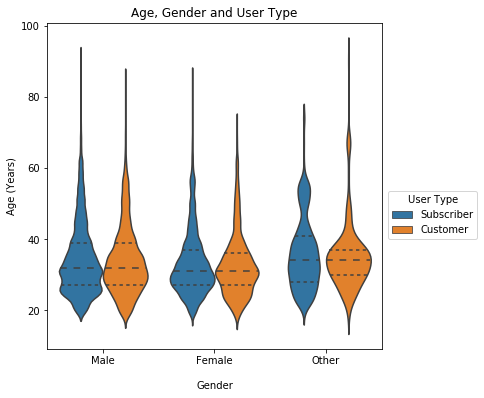

In [85]:
plt.figure(figsize=[6,6])
sb.violinplot(data=bike,x='member_gender',y='age',hue='user_type',inner='quartile')
plt.xlabel('Gender', labelpad=15)
plt.ylabel('Age (Years)')
plt.title('Age, Gender and User Type')
plt.legend(title='User Type', bbox_to_anchor=(1.3,0.5));

Gender, User type and age is not related in any way with each other

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> I did not find anything interesting in this part because I got the same results when using bivariante and I was able to confirm these findings with multivariante one.

### Were there any interesting or surprising interactions between features?

> I did not find anything interesting in this part.


## Conclusions
>You can write a summary of the main findings and reflect on the steps taken during the data exploration.



> Remove all Tips mentioned above, before you convert this notebook to PDF/HTML


> At the end of your report, make sure that you export the notebook as an
html file from the `File > Download as... > HTML or PDF` menu. Make sure you keep
track of where the exported file goes, so you can put it in the same folder
as this notebook for project submission. Also, make sure you remove all of
the quote-formatted guide notes like this one before you finish your report!

